Alleyah Pauline C. Manalili

# DBSCAN Project  

## The Data


Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal


Data Set Information:

Provide all relevant information about your data set.


Attribute Information:

    1) FRESH: annual spending (m.u.) on fresh products (Continuous);
    2) MILK: annual spending (m.u.) on milk products (Continuous);
    3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
    4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
    5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
    6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
    7) CHANNEL: customers  Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
    8) REGION: customers  Region Lisnon, Oporto or Other (Nominal)
 

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

**COMPLETE THE REQUIRED TASKS:**


## EDA

**TASK: Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column.**

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


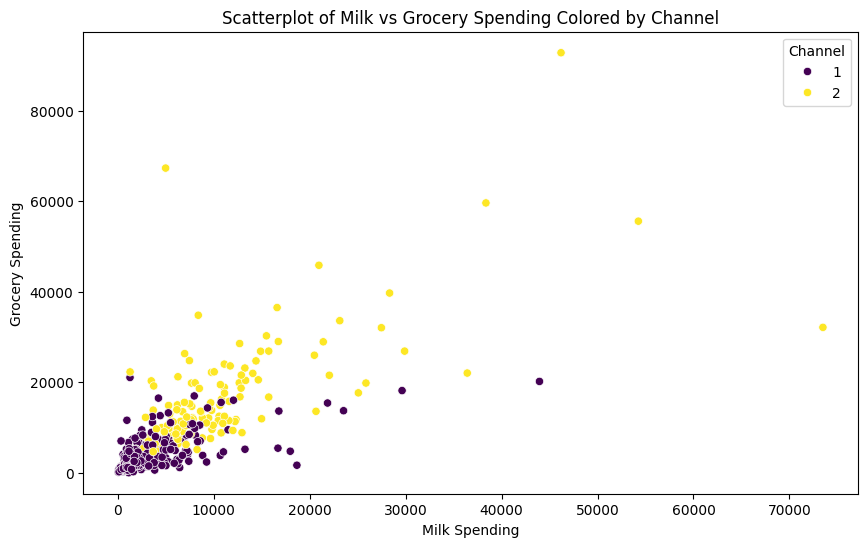

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Wholesale customers data.csv')

print(data.head())

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Milk', y='Grocery', hue='Channel', palette='viridis')

plt.title('Scatterplot of Milk vs Grocery Spending Colored by Channel')
plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')

plt.show()

**TASK: Use seaborn to create a histogram of MILK spending, colored by Channel. Can you figure out how to use seaborn to "stack" the channels, instead of have them overlap?**

<Figure size 1000x600 with 0 Axes>

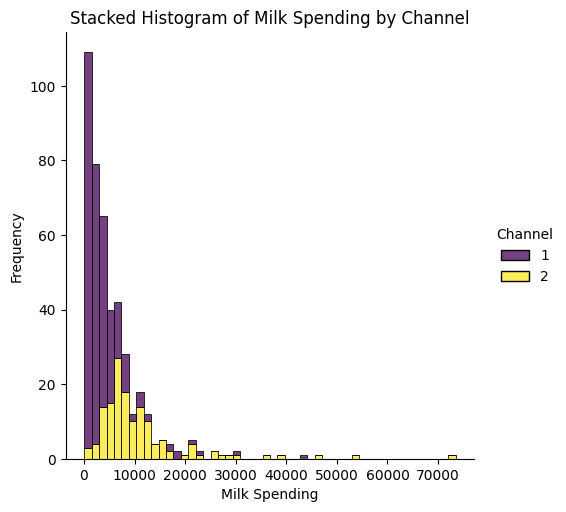

In [4]:
plt.figure(figsize=(10, 6))
sns.displot(data=data, x='Milk', hue='Channel', multiple='stack', palette='viridis')
plt.title('Stacked Histogram of Milk Spending by Channel')
plt.xlabel('Milk Spending')
plt.ylabel('Frequency')
plt.show()

**TASK: Create an annotated clustermap of the correlations between spending on different cateogires.**

<Figure size 1200x800 with 0 Axes>

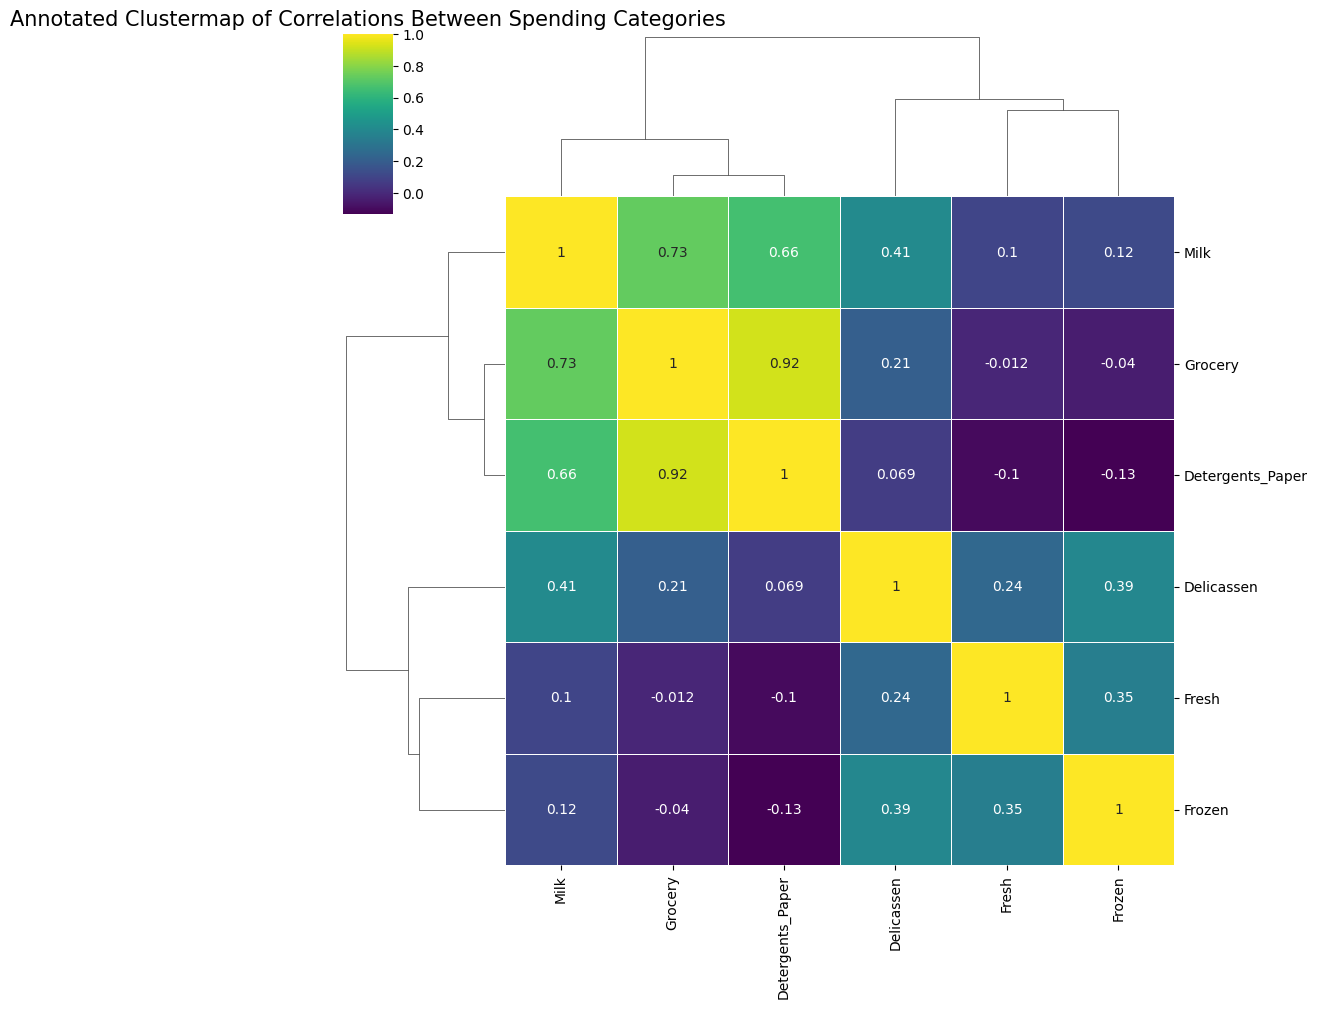

In [9]:
spending_categories = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
correlation_matrix = data[spending_categories].corr()

plt.figure(figsize=(12, 8))
sns.clustermap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5, figsize=(10, 10))
plt.title('Annotated Clustermap of Correlations Between Spending Categories', size=15)
plt.show()

**TASK: Create a PairPlot of the dataframe, colored by Region.**

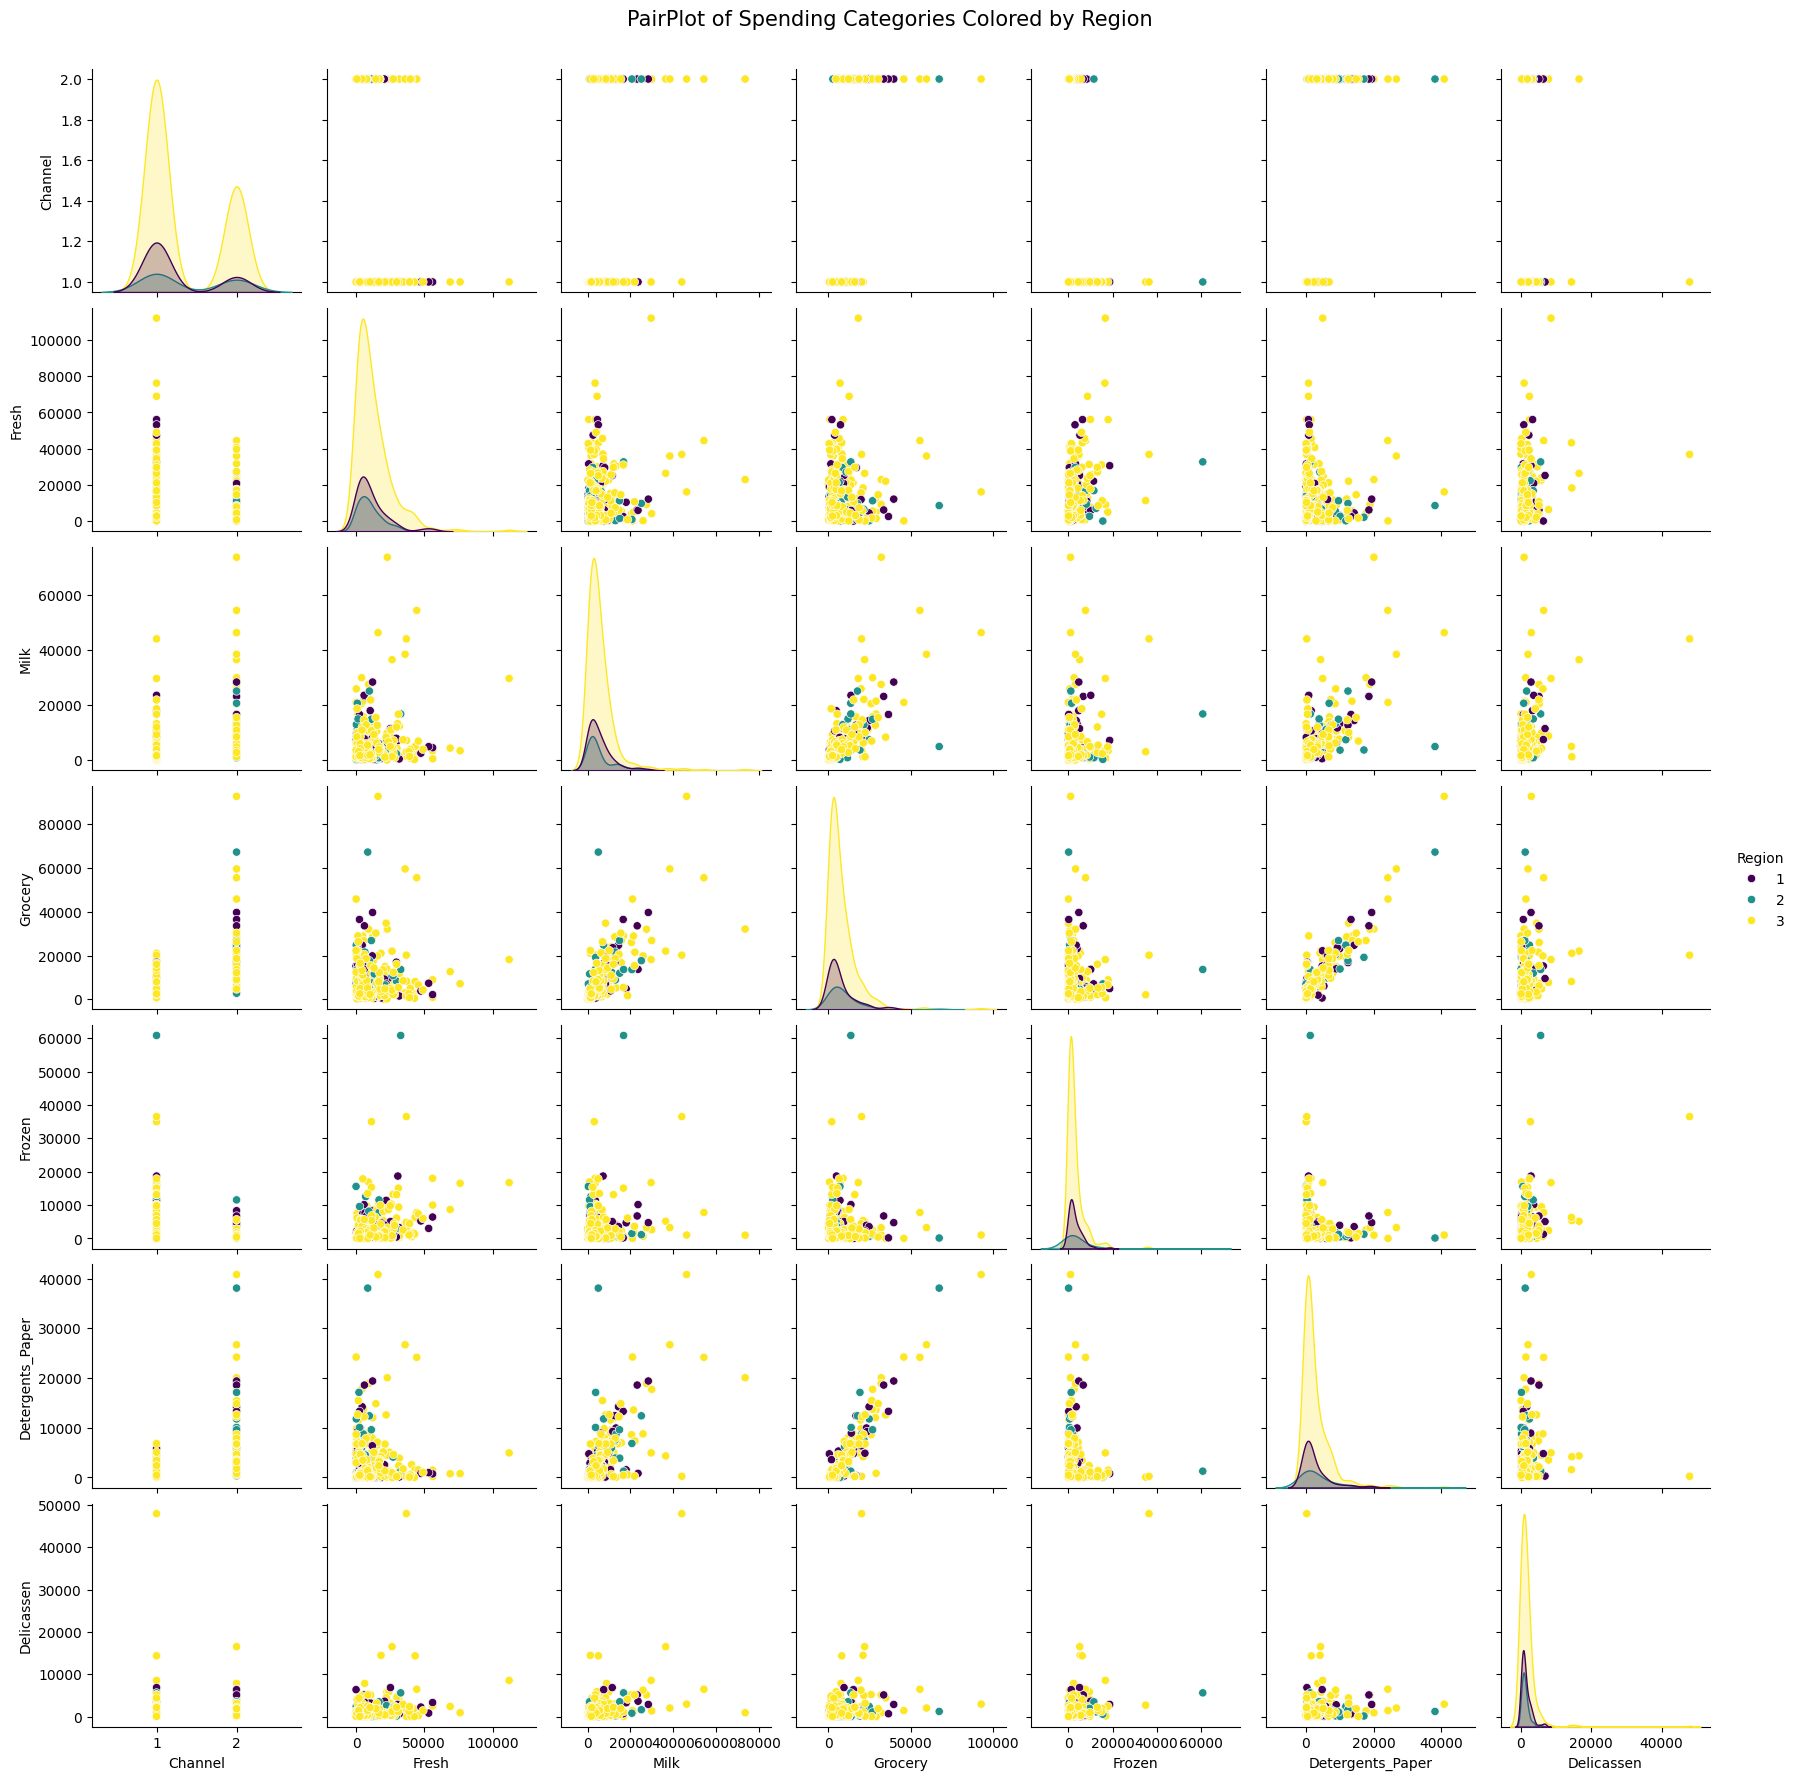

In [6]:
sns.pairplot(data, hue='Region', palette='viridis', diag_kind='kde')
plt.suptitle('PairPlot of Spending Categories Colored by Region', y=1.02, size=15)
plt.show()

## DBSCAN

**TASK: Since the values of the features are in different orders of magnitude, let's scale the data. Use StandardScaler to scale the data.**

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = data.copy()
data_scaled[spending_categories] = scaler.fit_transform(data[spending_categories])

print(data_scaled.head())

   Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0        2       3  0.052933  0.523568 -0.041115 -0.589367         -0.043569   
1        2       3 -0.391302  0.544458  0.170318 -0.270136          0.086407   
2        2       3 -0.447029  0.408538 -0.028157 -0.137536          0.133232   
3        1       3  0.100111 -0.624020 -0.392977  0.687144         -0.498588   
4        2       3  0.840239 -0.052396 -0.079356  0.173859         -0.231918   

   Delicassen  
0   -0.066339  
1    0.089151  
2    2.243293  
3    0.093411  
4    1.299347  


**TASK: Use DBSCAN and a for loop to create a variety of models testing different epsilon values. Set min_samples equal to 2 times the number of features. During the loop, keep track of and log the percentage of points that are outliers. For reference the solutions notebooks uses the following range of epsilon values for testing:**

    np.linspace(0.001,3,50)

In [15]:
import numpy as np
from sklearn.cluster import DBSCAN

# Initialize lists to store the results
outlier_percent = []
number_of_outliers = []

# Loop through epsilon values
for eps in np.linspace(0.001, 3, 50):
    
    # Create DBSCAN model
    dbscan = DBSCAN(eps=eps)
    
    # Fit the model to your scaled data
    dbscan.fit(data_scaled)
    
    # Log the number of outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log the percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    outlier_percent.append(perc_outliers)

    # Print the epsilon value and its corresponding percentage of outliers
    print(f"Epsilon: {eps:.3f}, Percentage of Outliers: {perc_outliers:.2f}%")


Epsilon: 0.001, Percentage of Outliers: 100.00%
Epsilon: 0.062, Percentage of Outliers: 100.00%
Epsilon: 0.123, Percentage of Outliers: 100.00%
Epsilon: 0.185, Percentage of Outliers: 98.86%
Epsilon: 0.246, Percentage of Outliers: 91.36%
Epsilon: 0.307, Percentage of Outliers: 82.50%
Epsilon: 0.368, Percentage of Outliers: 77.05%
Epsilon: 0.429, Percentage of Outliers: 70.00%
Epsilon: 0.491, Percentage of Outliers: 62.27%
Epsilon: 0.552, Percentage of Outliers: 52.05%
Epsilon: 0.613, Percentage of Outliers: 42.27%
Epsilon: 0.674, Percentage of Outliers: 34.32%
Epsilon: 0.735, Percentage of Outliers: 30.91%
Epsilon: 0.797, Percentage of Outliers: 27.50%
Epsilon: 0.858, Percentage of Outliers: 23.86%
Epsilon: 0.919, Percentage of Outliers: 22.95%
Epsilon: 0.980, Percentage of Outliers: 20.23%
Epsilon: 1.041, Percentage of Outliers: 17.95%
Epsilon: 1.103, Percentage of Outliers: 14.77%
Epsilon: 1.164, Percentage of Outliers: 13.41%
Epsilon: 1.225, Percentage of Outliers: 10.91%
Epsilon: 1

**TASK: Create a line plot of the percentage of outlier points versus the epsilon value choice.**

Text(0.5, 0, 'Epsilon Value')

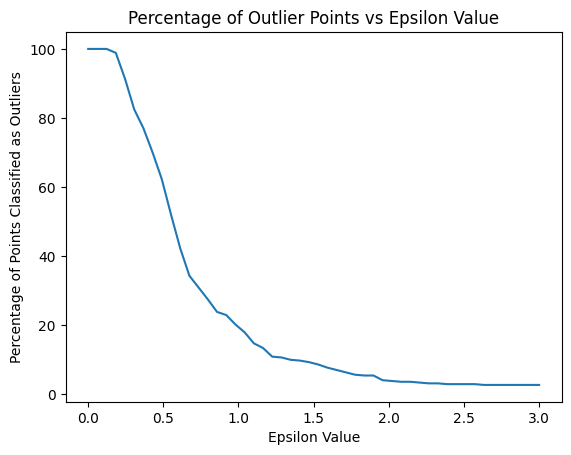

In [17]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.title('Percentage of Outlier Points vs Epsilon Value')
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

## DBSCAN with Chosen Epsilon

**TASK: Based on the plot created in the previous task, retrain a DBSCAN model with a reasonable epsilon value. Note: For reference, the solutions use eps=2.**

In [19]:
dbscan = DBSCAN(eps=2)
dbscan.fit(data_scaled)

DBSCAN(eps=2)

**TASK: Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.**

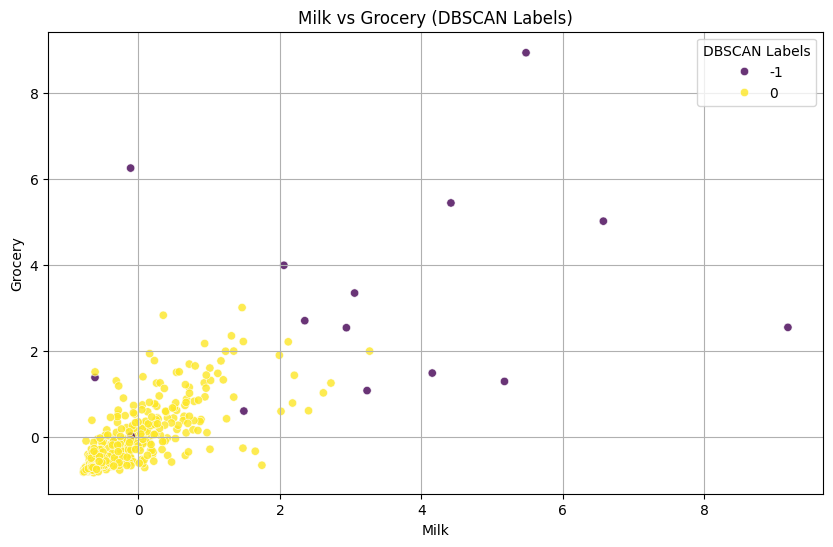

In [22]:
milk_grocery_df = pd.DataFrame({'Milk': data_scaled['Milk'], 'Grocery': data_scaled['Grocery'], 'Labels': labels})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=milk_grocery_df, x='Milk', y='Grocery', hue='Labels', palette='viridis', alpha=0.8)
plt.title('Milk vs Grocery (DBSCAN Labels)')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.legend(title='DBSCAN Labels')
plt.grid(True)
plt.show()

**TASK: Create a scatterplot of Milk vs. Detergents Paper colored by the labels.**

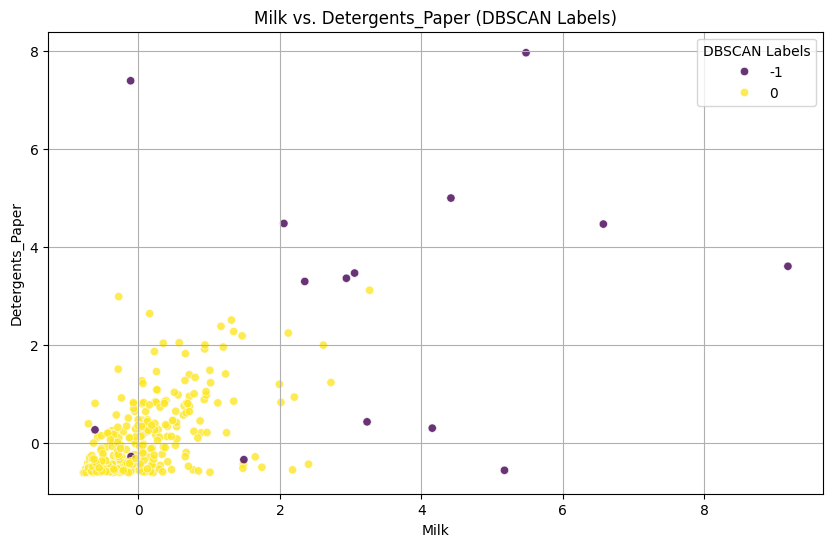

In [23]:
milk_detergents_df = pd.DataFrame({'Milk': data_scaled['Milk'], 'Detergents_Paper': data_scaled['Detergents_Paper'], 'Labels': labels})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=milk_detergents_df, x='Milk', y='Detergents_Paper', hue='Labels', palette='viridis', alpha=0.8)
plt.title('Milk vs. Detergents_Paper (DBSCAN Labels)')
plt.xlabel('Milk')
plt.ylabel('Detergents_Paper')
plt.legend(title='DBSCAN Labels')
plt.grid(True)
plt.show()

**TASK: Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.**

In [27]:
data['Labels'] = labels

**TASK: Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.**

In [28]:
grouped_data = data.groupby('Labels')

mean_spending = grouped_data.mean()

print("Mean Spending for Clusters and Outliers:")
print(mean_spending)

Mean Spending for Clusters and Outliers:
         Channel    Region         Fresh          Milk       Grocery  \
Labels                                                                 
-1      1.588235  2.647059  30161.529412  26872.411765  33575.823529   
 0      1.312057  2.539007  11270.413712   4949.234043   6921.449173   

              Frozen  Detergents_Paper   Delicassen  
Labels                                               
-1      12380.235294      14612.294118  8185.411765  
 0       2697.839243       2410.042553  1257.189125  


**TASK: Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.**

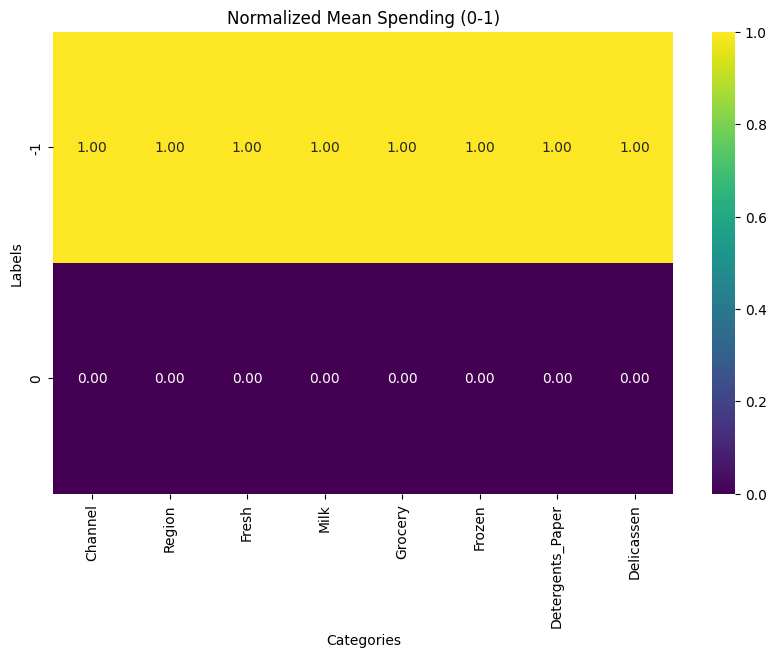

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(mean_spending)

normalized_df = pd.DataFrame(normalized_data, columns=mean_spending.columns, index=mean_spending.index)

plt.figure(figsize=(10, 6))
sns.heatmap(normalized_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Normalized Mean Spending (0-1)')
plt.xlabel('Categories')
plt.ylabel('Labels')
plt.show()

**TASK: Create another heatmap similar to the one above, but with the outliers removed**

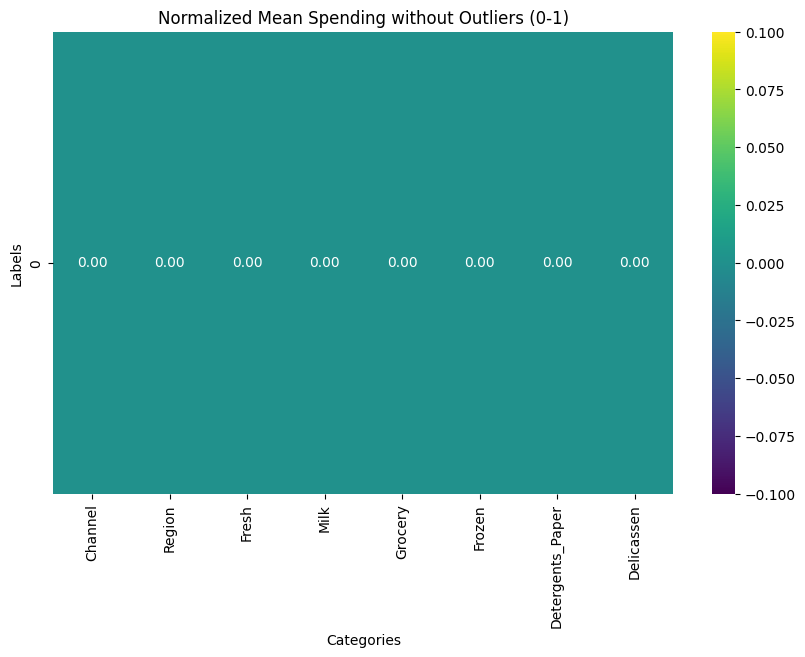

In [36]:
normalized_df_no_outliers = normalized_df[normalized_df.index != -1]

plt.figure(figsize=(10, 6))
sns.heatmap(normalized_df_no_outliers, annot=True, cmap='viridis', fmt=".2f")
plt.title('Normalized Mean Spending without Outliers (0-1)')
plt.xlabel('Categories')
plt.ylabel('Labels')
plt.show()

**TASK: What spending category were the two clusters mode different in?**

In [37]:
mean_spending = data.groupby('Labels').mean()

mean_diff = abs(mean_spending.loc[0] - mean_spending.loc[-1])

max_diff_category = mean_diff.idxmax()
max_diff_value = mean_diff.max()

print(f"The spending category where the two clusters differ the most is: {max_diff_category}")
print(f"The difference in spending for this category is: {max_diff_value:.2f}")

The spending category where the two clusters differ the most is: Grocery
The difference in spending for this category is: 26654.37
